In [1]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import mccd
from astropy.io import fits

%pylab inline

print(tf.__version__)

runstats and/or skimage could not be imported because not installed
Populating the interactive namespace from numpy and matplotlib
2.4.4


In [2]:
print(tf.test.gpu_device_name()) 


/device:GPU:0


In [3]:
! ls

cerate-testing-exposures.ipynb	 checking-trained-learnlet-models.ipynb
chcek-deep-mccd.ipynb		 checking-training.ipynb
check-eigenPSF-extraction.ipynb  config_deep_mccd.ini
check-unet-train.ipynb		 noise-distribution.ipynb


In [4]:
config_file_path = '/home/tliaudat/github/aziz_repos/deep_mccd/testing_notebooks/candide_notebooks/config_deep_mccd.ini'



In [5]:

mccd_instance = mccd.auxiliary_fun.RunMCCD(config_file_path, fits_table_pos=1)




In [6]:
mccd_instance.parse_config_file()


In [7]:

mccd_instance.mccd_inputs_kw


{'input_folder_path': '/n05data/tliaudat/new_deepmccd/testing_realistic_sims/inputs/testing/',
 'output_path': '/n05data/tliaudat/new_deepmccd/testing_realistic_sims/inputs/testing/',
 'min_n_stars': 2,
 'file_pattern': 'sexcat-*-*.fits',
 'separator': '-',
 'outlier_std_max': 100.0,
 'save_name': 'train_star_selection',
 'save_extension': '.fits'}

In [8]:

file_pattern = 'train_star_selection-*.fits'

# Preprocess
mccd_inputs = mccd.mccd_utils.MccdInputs(
    separator=mccd_instance.mccd_inputs_kw['separator'],
    fits_tb_pos=mccd_instance.fits_table_pos
)
print('Processing dataset..')
catalog_ids = mccd_inputs.preprocess_data(
    folder_path=mccd_instance.mccd_inputs_kw['input_folder_path'],
    pattern=file_pattern,
)


catalog_ids = mccd_inputs.get_catalog_ids()
print('catalog_ids: ', catalog_ids)


Processing dataset..
catalog_ids:  ['/n05data/tliaudat/new_deepmccd/testing_realistic_sims/inputs/testing/train_star_selection']


In [9]:

# mccd_instance.fit_output_dir = '/n05data/tliaudat/new_deepmccd/testing_realistic_sims/outputs/testing/'

mccd_instance.mccd_inputs = mccd_inputs

mccd_instance.catalog_ids = ['2500000']

print(mccd_instance.mccd_inputs_kw['output_path'])
print(mccd_instance.fit_output_dir)


/n05data/tliaudat/new_deepmccd/testing_realistic_sims/inputs/testing/
/n05data/tliaudat/new_deepmccd/testing_realistic_sims/outputs/testing/


In [10]:

print(mccd_instance.preprocess_name)
print(mccd_instance.separator)
print(mccd_instance.catalog_ids)
print(mccd_instance.file_extension)

print(mccd_instance.mccd_inst_kw)
print(mccd_instance.mccd_fit_kw)

print(mccd_instance.fitting_model_saving_name)




train_star_selection
-
['2500000']
.fits
{'n_comp_loc': 4, 'd_comp_glob': 6, 'd_hyb_loc': 2, 'min_d_comp_glob': None, 'filters': None, 'ksig_loc': 0.0, 'ksig_glob': 0.0, 'rmse_thresh': 1.25, 'ccd_star_thresh': 10.15, 'fp_geometry': 'CFIS'}
{'psf_size': 6.2, 'psf_size_type': 'R2', 'n_eigenvects': 5, 'nb_iter': 1, 'nb_iter_glob': 2, 'nb_iter_loc': 2, 'nb_subiter_S_loc': 300, 'nb_subiter_A_loc': 500, 'nb_subiter_S_glob': 100, 'nb_subiter_A_glob': 200, 'loc_model': 'hybrid'}
fitted_model


In [11]:
# Fit the model
mccd_instance.fit_models()


No SNR weights are being used.
Running basic initialization tasks...
... Done.
Constructing local spatial constraint...


/home/tliaudat/github/aziz_repos/deep_mccd/mccd/utils.py:564: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  self.VT = np.vstack((eigenvect for eigenvect in list_eigenvects))


... Done.
Building position polynomials...
... Done.


1/1 [==============================] - 1s 539ms/step - loss: 0.1094


100% (100 of 100) |######################| Elapsed Time: 0:01:33 Time:  0:01:33
100% (200 of 200) |######################| Elapsed Time: 0:00:53 Time:  0:00:53
100% (100 of 100) |######################| Elapsed Time: 0:01:32 Time:  0:01:32
 59% (177 of 300) |############          | Elapsed Time: 0:00:15 ETA:   0:00:09

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:15 Time:  0:00:15
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 99% (297 of 300) |##################### | Elapsed Time: 0:00:25 ETA:   0:00:00

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:25 Time:  0:00:25
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 42% (126 of 300) |#########             | Elapsed Time: 0:00:11 ETA:   0:00:15

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:11 Time:  0:00:11
100% (500 of 500) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (300 of 300) |######################| Elapsed Time: 0:00:25 Time:  0:00:25
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 38% (114 of 300) |########              | Elapsed Time: 0:00:09 ETA:   0:00:14

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (500 of 500) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
 75% (225 of 300) |################      | Elapsed Time: 0:00:18 ETA:   0:00:05

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (300 of 300) |######################| Elapsed Time: 0:00:24 Time:  0:00:24
100% (500 of 500) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
 54% (162 of 300) |###########           | Elapsed Time: 0:00:13 ETA:   0:00:11

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:13 Time:  0:00:13
100% (500 of 500) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
 39% (118 of 300) |########              | Elapsed Time: 0:00:10 ETA:   0:00:14

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:10 Time:  0:00:10
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 49% (149 of 300) |##########            | Elapsed Time: 0:00:13 ETA:   0:00:18

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:13 Time:  0:00:13
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 54% (162 of 300) |###########           | Elapsed Time: 0:00:15 ETA:   0:00:12

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:15 Time:  0:00:15
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (300 of 300) |######################| Elapsed Time: 0:00:28 Time:  0:00:28
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 56% (170 of 300) |############          | Elapsed Time: 0:00:16 ETA:   0:00:13

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:16 Time:  0:00:16
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 60% (181 of 300) |#############         | Elapsed Time: 0:00:15 ETA:   0:00:09

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:15 Time:  0:00:15
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 54% (162 of 300) |###########           | Elapsed Time: 0:00:14 ETA:   0:00:13

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:14 Time:  0:00:14
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 52% (158 of 300) |###########           | Elapsed Time: 0:00:14 ETA:   0:00:13

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:14 Time:  0:00:14
100% (500 of 500) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
 63% (190 of 300) |#############         | Elapsed Time: 0:00:16 ETA:   0:00:10

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:16 Time:  0:00:16
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 75% (225 of 300) |################      | Elapsed Time: 0:00:21 ETA:   0:00:07

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:21 Time:  0:00:21
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 72% (217 of 300) |###############       | Elapsed Time: 0:00:20 ETA:   0:00:07

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:20 Time:  0:00:20
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 36% (110 of 300) |########              | Elapsed Time: 0:00:09 ETA:   0:00:17

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:10 Time:  0:00:10
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (300 of 300) |######################| Elapsed Time: 0:00:25 Time:  0:00:25
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 42% (126 of 300) |#########             | Elapsed Time: 0:00:11 ETA:   0:00:17

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:11 Time:  0:00:11
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 78% (234 of 300) |#################     | Elapsed Time: 0:00:21 ETA:   0:00:06

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:21 Time:  0:00:21
100% (500 of 500) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (300 of 300) |######################| Elapsed Time: 0:00:28 Time:  0:00:28
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 49% (149 of 300) |##########            | Elapsed Time: 0:00:15 ETA:   0:00:16

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:15 Time:  0:00:15
100% (500 of 500) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
 27% (82 of 300) |######                 | Elapsed Time: 0:00:08 ETA:   0:00:22

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:08 Time:  0:00:08
100% (500 of 500) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
 45% (137 of 300) |##########            | Elapsed Time: 0:00:12 ETA:   0:00:12

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:12 Time:  0:00:12
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 48% (145 of 300) |##########            | Elapsed Time: 0:00:13 ETA:   0:00:12

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:13 Time:  0:00:13
100% (500 of 500) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
 74% (222 of 300) |################      | Elapsed Time: 0:00:20 ETA:   0:00:07

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:20 Time:  0:00:20
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 97% (293 of 300) |##################### | Elapsed Time: 0:00:25 ETA:   0:00:00

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:26 Time:  0:00:26
100% (500 of 500) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (300 of 300) |######################| Elapsed Time: 0:00:25 Time:  0:00:25
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (300 of 300) |######################| Elapsed Time: 0:00:28 Time:  0:00:28
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 72% (217 of 300) |###############       | Elapsed Time: 0:00:20 ETA:   0:00:08

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:21 Time:  0:00:21
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 48% (145 of 300) |##########            | Elapsed Time: 0:00:14 ETA:   0:00:15

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:14 Time:  0:00:14
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 84% (253 of 300) |##################    | Elapsed Time: 0:00:21 ETA:   0:00:04

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:22 Time:  0:00:22
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 62% (186 of 300) |#############         | Elapsed Time: 0:00:17 ETA:   0:00:11

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:17 Time:  0:00:17
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (300 of 300) |######################| Elapsed Time: 0:00:26 Time:  0:00:26
100% (500 of 500) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
 94% (282 of 300) |####################  | Elapsed Time: 0:00:27 ETA:   0:00:01

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:27 Time:  0:00:27
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (300 of 300) |######################| Elapsed Time: 0:00:27 Time:  0:00:27
100% (500 of 500) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
 91% (274 of 300) |####################  | Elapsed Time: 0:00:26 ETA:   0:00:02

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:26 Time:  0:00:26
100% (500 of 500) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
 55% (166 of 300) |############          | Elapsed Time: 0:00:15 ETA:   0:00:11

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:15 Time:  0:00:15
 35% (105 of 300) |#######               | Elapsed Time: 0:00:09 ETA:   0:00:18

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:10 Time:  0:00:10
 94% (282 of 300) |####################  | Elapsed Time: 0:00:24 ETA:   0:00:01

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:24 Time:  0:00:24
100% (300 of 300) |######################| Elapsed Time: 0:00:28 Time:  0:00:28
 15% (46 of 300) |###                    | Elapsed Time: 0:00:04 ETA:   0:00:23

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
 63% (190 of 300) |#############         | Elapsed Time: 0:00:17 ETA:   0:00:10

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:17 Time:  0:00:17
 59% (178 of 300) |#############         | Elapsed Time: 0:00:17 ETA:   0:00:12

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:17 Time:  0:00:17
 32% (97 of 300) |#######                | Elapsed Time: 0:00:09 ETA:   0:00:20

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:09 Time:  0:00:09
 58% (174 of 300) |############          | Elapsed Time: 0:00:16 ETA:   0:00:11

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:16 Time:  0:00:16
 82% (246 of 300) |##################    | Elapsed Time: 0:00:23 ETA:   0:00:05

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:23 Time:  0:00:23
100% (300 of 300) |######################| Elapsed Time: 0:00:32 Time:  0:00:32
 47% (142 of 300) |##########            | Elapsed Time: 0:00:20 ETA:   0:00:24

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:21 Time:  0:00:21
 39% (118 of 300) |########              | Elapsed Time: 0:00:18 ETA:   0:00:28

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (300 of 300) |######################| Elapsed Time: 0:00:45 Time:  0:00:45
 15% (46 of 300) |###                    | Elapsed Time: 0:00:06 ETA:   0:00:37

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
 50% (150 of 300) |###########           | Elapsed Time: 0:00:23 ETA:   0:00:23

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:24 Time:  0:00:24
100% (300 of 300) |######################| Elapsed Time: 0:00:45 Time:  0:00:45
100% (300 of 300) |######################| Elapsed Time: 0:00:45 Time:  0:00:45
100% (300 of 300) |######################| Elapsed Time: 0:00:45 Time:  0:00:45
100% (300 of 300) |######################| Elapsed Time: 0:00:44 Time:  0:00:44
100% (300 of 300) |######################| Elapsed Time: 0:00:45 Time:  0:00:45
 46% (138 of 300) |##########            | Elapsed Time: 0:00:21 ETA:   0:00:25

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:21 Time:  0:00:21
100% (300 of 300) |######################| Elapsed Time: 0:00:45 Time:  0:00:45
100% (300 of 300) |######################| Elapsed Time: 0:00:46 Time:  0:00:46
 60% (182 of 300) |#############         | Elapsed Time: 0:00:27 ETA:   0:00:18

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:27 Time:  0:00:27
 62% (186 of 300) |#############         | Elapsed Time: 0:00:28 ETA:   0:00:17

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:28 Time:  0:00:28
 46% (138 of 300) |##########            | Elapsed Time: 0:00:21 ETA:   0:00:24

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:21 Time:  0:00:21
 86% (258 of 300) |##################    | Elapsed Time: 0:00:40 ETA:   0:00:06

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:40 Time:  0:00:40
 36% (110 of 300) |########              | Elapsed Time: 0:00:16 ETA:   0:00:29

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:16 Time:  0:00:16
100% (300 of 300) |######################| Elapsed Time: 0:00:45 Time:  0:00:45
100% (300 of 300) |######################| Elapsed Time: 0:00:45 Time:  0:00:45
100% (300 of 300) |######################| Elapsed Time: 0:00:46 Time:  0:00:46
 52% (158 of 300) |###########           | Elapsed Time: 0:00:25 ETA:   0:00:22

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:26 Time:  0:00:26
100% (300 of 300) |######################| Elapsed Time: 0:00:45 Time:  0:00:45
100% (300 of 300) |######################| Elapsed Time: 0:00:45 Time:  0:00:45
 38% (114 of 300) |########              | Elapsed Time: 0:00:17 ETA:   0:00:29

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:17 Time:  0:00:17
100% (300 of 300) |######################| Elapsed Time: 0:00:45 Time:  0:00:45
 35% (106 of 300) |#######               | Elapsed Time: 0:00:16 ETA:   0:00:28

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:16 Time:  0:00:16
100% (300 of 300) |######################| Elapsed Time: 0:00:44 Time:  0:00:44
 67% (202 of 300) |##############        | Elapsed Time: 0:00:31 ETA:   0:00:15

 - Converged!


100% (300 of 300) |######################| Elapsed Time: 0:00:31 Time:  0:00:31


CCD num 00, 	 15 outliers, 	15 stars, 	153 star threshold number.
CCD num 01, 	 16 outliers, 	16 stars, 	163 star threshold number.
CCD num 02, 	 15 outliers, 	15 stars, 	153 star threshold number.
CCD num 03, 	 16 outliers, 	16 stars, 	163 star threshold number.
CCD num 04, 	 16 outliers, 	16 stars, 	163 star threshold number.
CCD num 05, 	 15 outliers, 	15 stars, 	153 star threshold number.
CCD num 06, 	 16 outliers, 	16 stars, 	163 star threshold number.
CCD num 07, 	 16 outliers, 	16 stars, 	163 star threshold number.
CCD num 08, 	 15 outliers, 	15 stars, 	153 star threshold number.
CCD num 09, 	 16 outliers, 	16 stars, 	163 star threshold number.
CCD num 10, 	 16 outliers, 	16 stars, 	163 star threshold number.
CCD num 11, 	 15 outliers, 	15 stars, 	153 star threshold number.
CCD num 12, 	 16 outliers, 	16 stars, 	163 star threshold number.
CCD num 13, 	 15 outliers, 	15 stars, 	153 star threshold number.
CCD num 14, 	 15 outliers, 	15 stars, 	153 star threshold number.
CCD num 15

In [12]:
def my_fun(param, **args):
    
    print(param)
    print(args['dict_param'])
    

In [13]:

param = 'param'
args = {'dict_param': 'dict_param'}

my_fun(param, **args)


param
dict_param


In [19]:

fitted_model_path = '/n05data/tliaudat/new_deepmccd/testing_realistic_sims/outputs/testing/fitted_model-2500000.npy'


fitted_model = np.load(fitted_model_path, allow_pickle=True)[()]


In [28]:
print(fitted_model[0].keys())
print(fitted_model[1].keys())

dict_keys(['n_comp_loc', 'd_comp_glob', 'upfact'])
dict_keys(['n_ccd', 'obs_pos', 'A_loc', 'A_glob', 'S', 'flux_ref', 'psf_size', 'VT', 'Pi', 'alpha', 'ccd_list'])


In [37]:

fitted_model[1]['S'][-1].shape


(51, 51, 28)

In [38]:


mccd_instance.val_mccd_inputs = mccd_inputs
mccd_instance.val_catalog_ids = ['2500000']


In [39]:
mccd_instance.mccd_val_prepro_kw['output_path']

'/n05data/tliaudat/new_deepmccd/testing_realistic_sims/inputs/testing/'

In [40]:
!ls /n05data/tliaudat/new_deepmccd/testing_realistic_sims/inputs/testing/

test_star_selection-2500000.fits  train_star_selection-2500000.fits


In [41]:
mccd_instance.param_parser.get_extra_kw('val_model_input_dir')


'/n05data/tliaudat/new_deepmccd/testing_realistic_sims/outputs/testing/'

In [47]:
!ls /n05data/tliaudat/new_deepmccd/testing_realistic_sims/outputs/testing/


fitted_model-2500000.npy  validation_psf-2500000.fits


In [43]:
mccd_instance.param_parser.get_extra_kw('val_model_input_dir')


'/n05data/tliaudat/new_deepmccd/testing_realistic_sims/outputs/testing/'

In [44]:
mccd_instance.fitting_model_saving_name

'fitted_model'

In [45]:

print(mccd_instance.mccd_val_prepro_kw['save_name'])
print(mccd_instance.mccd_val_prepro_kw['separator'])
print(mccd_instance.mccd_val_prepro_kw['save_extension'])


test_star_selection
-
.fits


In [46]:

# Validate the model
mccd_instance.validate_models()


Validating catalog 2500000..
Validation catalog < validation_psf-2500000.fits > saved.


In [49]:

val_data_path = '/n05data/tliaudat/new_deepmccd/testing_realistic_sims/outputs/testing/validation_psf-2500000.fits'

val_data = fits.open(val_data_path)


In [51]:

val_data[1].columns


ColDefs(
    name = 'PSF_VIGNET_LIST'; format = '2601D'; dim = '(51, 51)'
    name = 'PSF_MOM_LIST'; format = '4D'; dim = '(4,)'
    name = 'STAR_MOM_LIST'; format = '4D'; dim = '(4,)'
    name = 'GLOB_POSITION_IMG_LIST'; format = '2D'; dim = '(2,)'
    name = 'VIGNET_LIST'; format = '2601D'; dim = '(51, 51)'
    name = 'MASK_LIST'; format = '2601D'; dim = '(51, 51)'
    name = 'CCD_ID_LIST'; format = '1D'
)

In [59]:

recon_psfs = val_data[1].data['PSF_VIGNET_LIST']
stars = val_data[1].data['VIGNET_LIST']

print(val_data[1].data['PSF_VIGNET_LIST'].shape)


(668, 51, 51)


In [60]:

print(val_data[1].data['VIGNET_LIST'].shape)


(668, 51, 51)


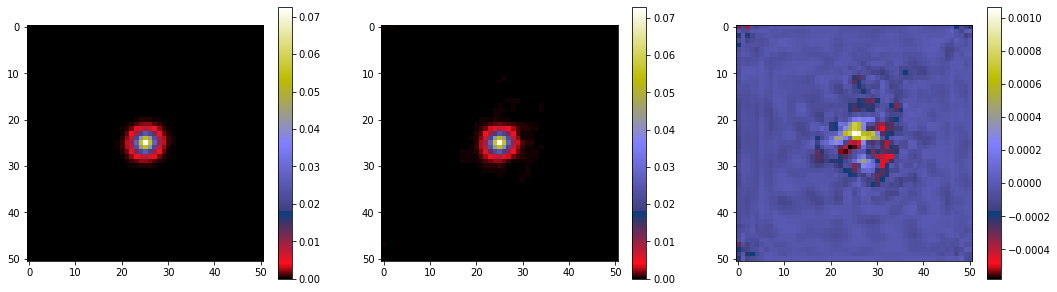

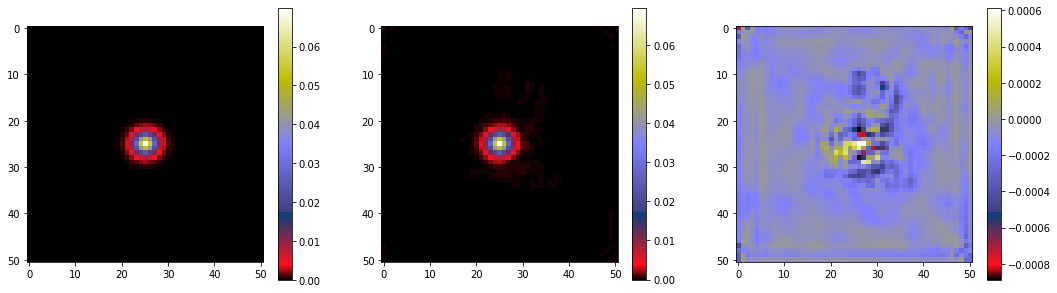

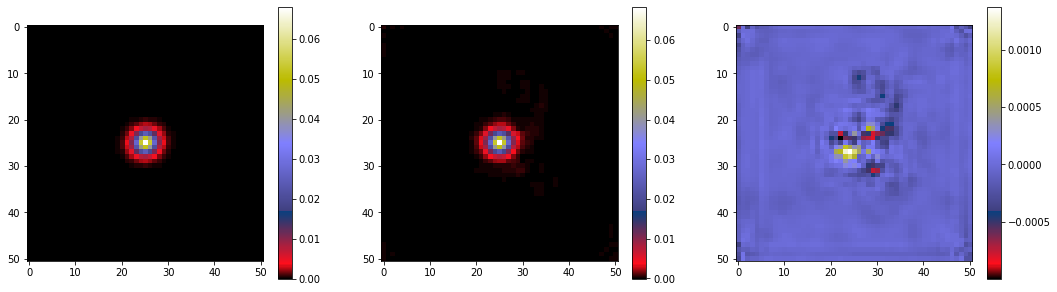

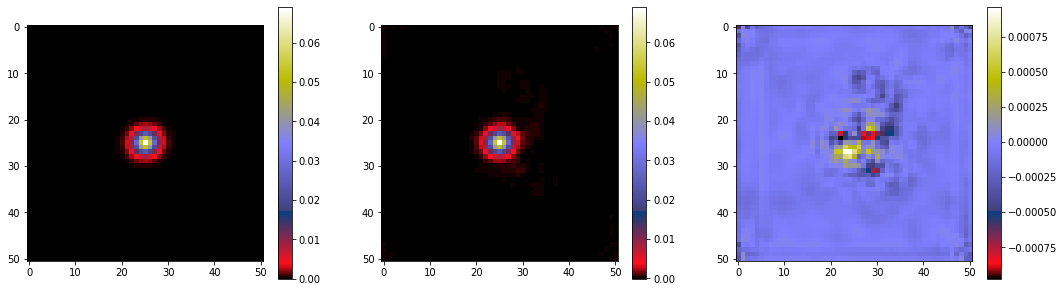

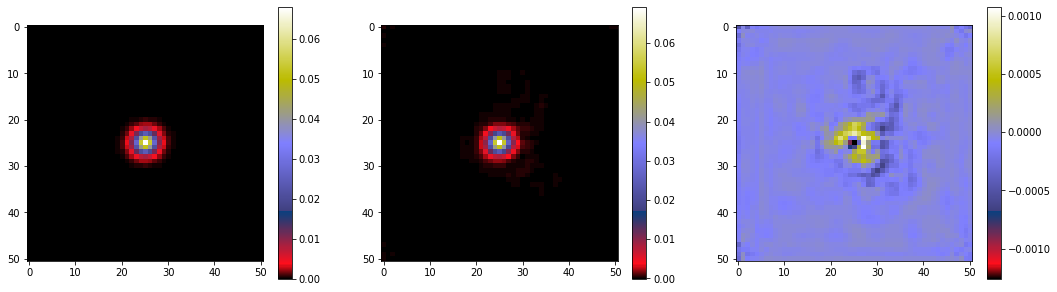

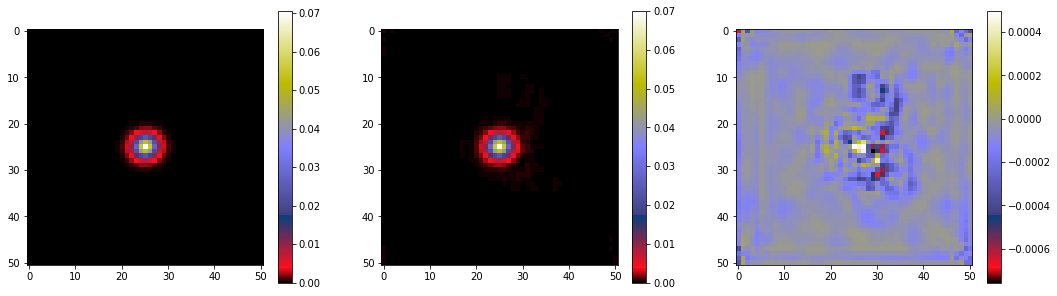

In [63]:

tot = 6
cmap = 'gist_stern'

for it in range(tot):

    figure(figsize=(18,5))
    
    subplot(131)
    imshow(stars[it,:,:], cmap=cmap);colorbar()
    
    subplot(132)
    imshow(recon_psfs[it,:,:], cmap=cmap);colorbar()
    
    subplot(133)
    imshow(stars[it,:,:] - recon_psfs[it,:,:], cmap=cmap);colorbar()
    show()
    
    

In [67]:


input_data_path = '/n05data/tliaudat/new_deepmccd/testing_realistic_sims/inputs/testing/train_star_selection-2500000.fits'
input_data = fits.open(val_data_path)


In [68]:

input_data[1].columns


ColDefs(
    name = 'PSF_VIGNET_LIST'; format = '2601D'; dim = '(51, 51)'
    name = 'PSF_MOM_LIST'; format = '4D'; dim = '(4,)'
    name = 'STAR_MOM_LIST'; format = '4D'; dim = '(4,)'
    name = 'GLOB_POSITION_IMG_LIST'; format = '2D'; dim = '(2,)'
    name = 'VIGNET_LIST'; format = '2601D'; dim = '(51, 51)'
    name = 'MASK_LIST'; format = '2601D'; dim = '(51, 51)'
    name = 'CCD_ID_LIST'; format = '1D'
)

In [70]:

input_data[1].data['PSF_VIGNET_LIST'].shape

input_psf = input_data[1].data['PSF_VIGNET_LIST']
input_stars = input_data[1].data['VIGNET_LIST']


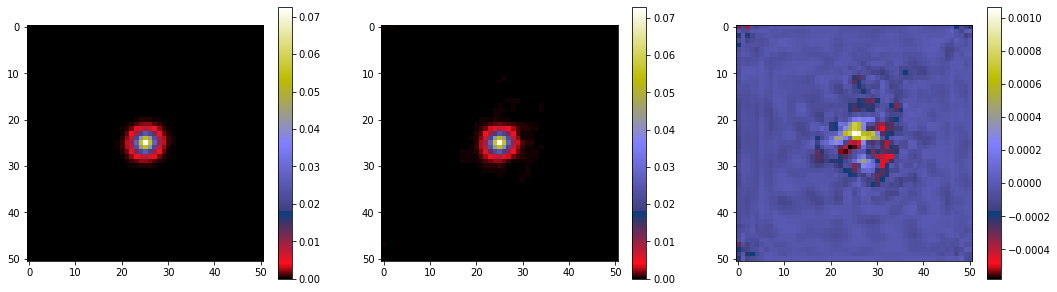

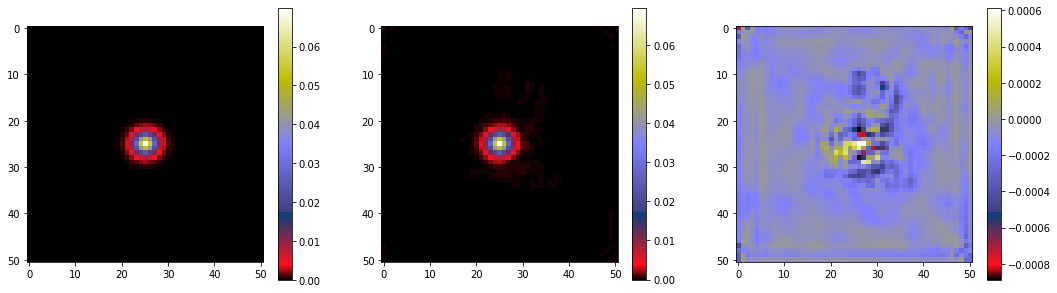

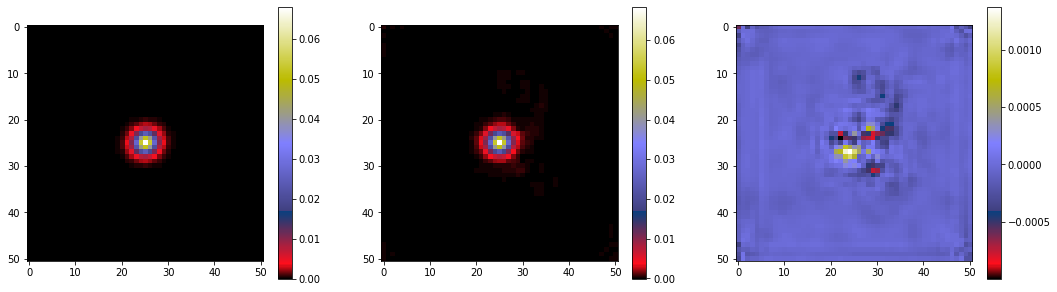

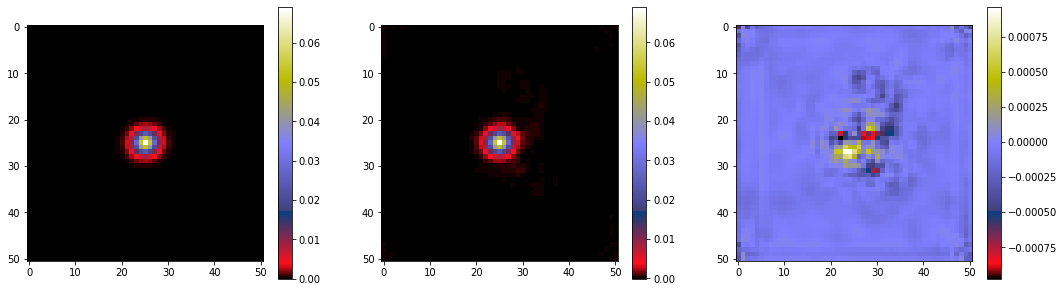

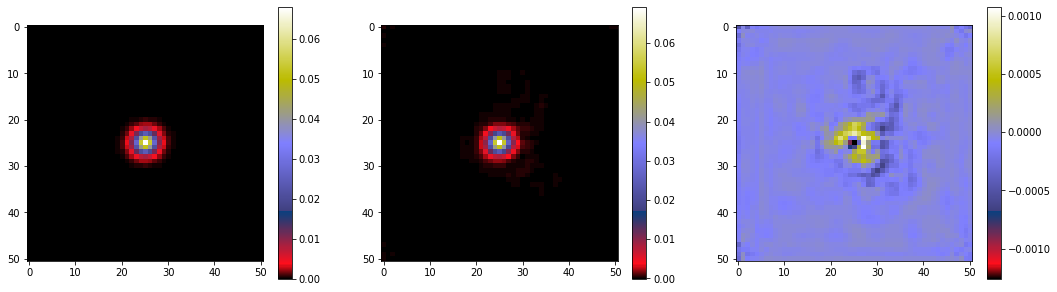

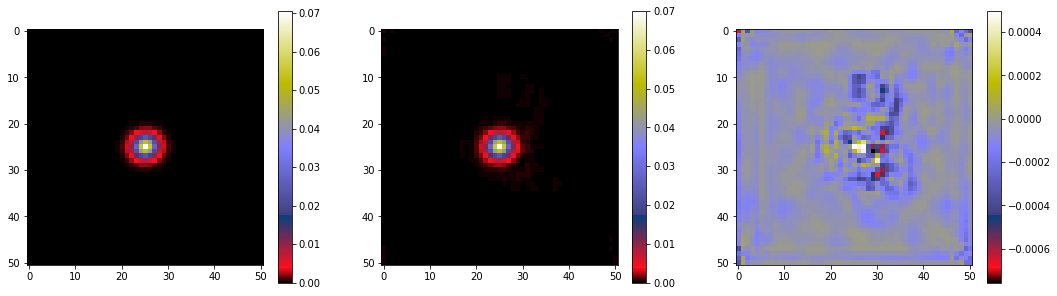

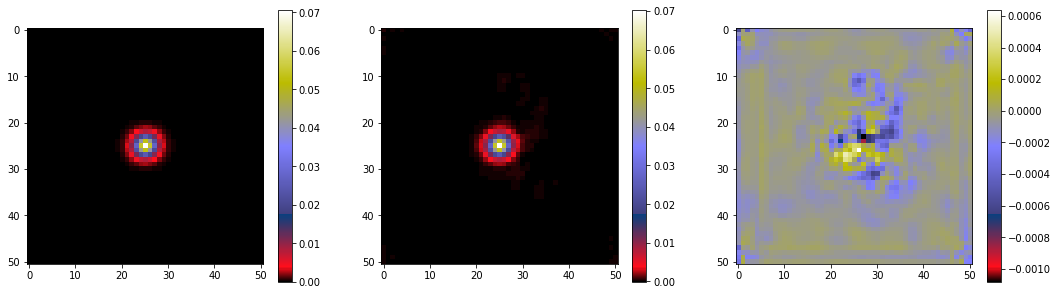

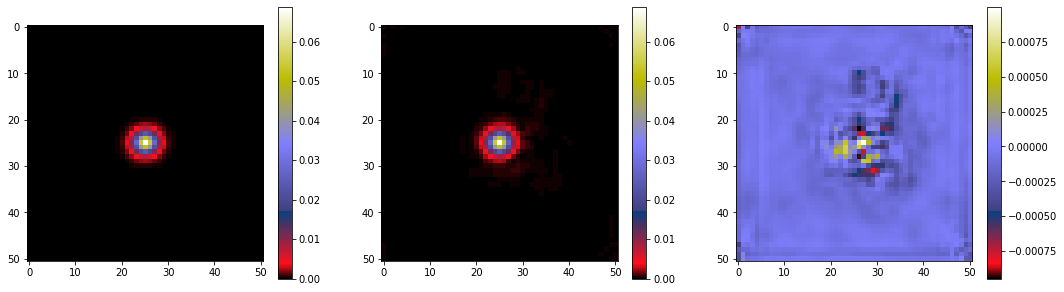

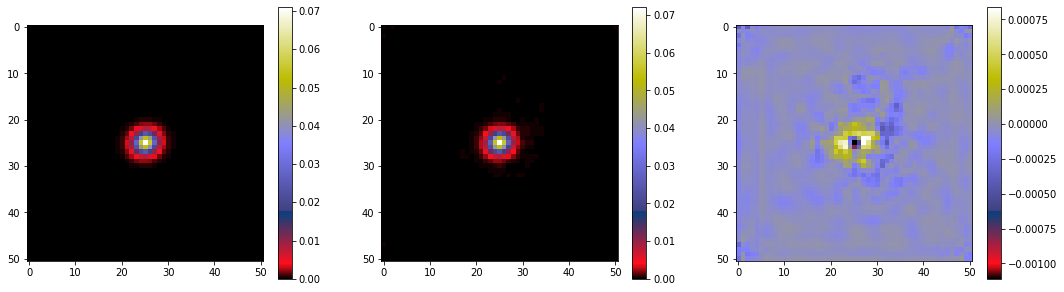

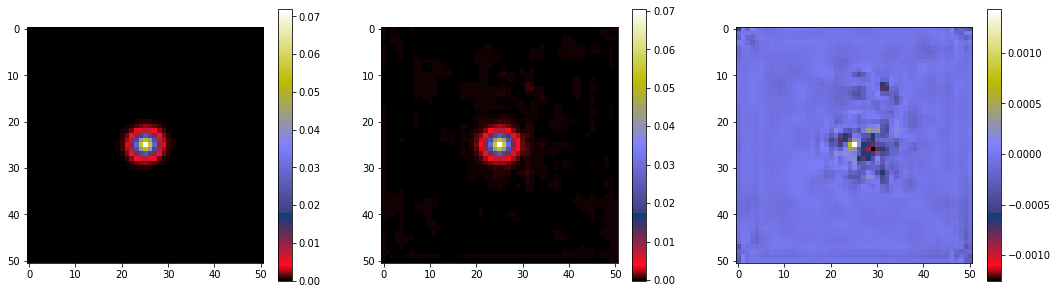

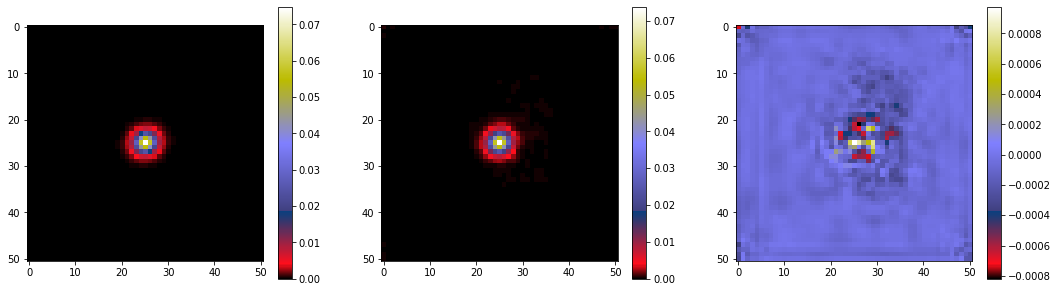

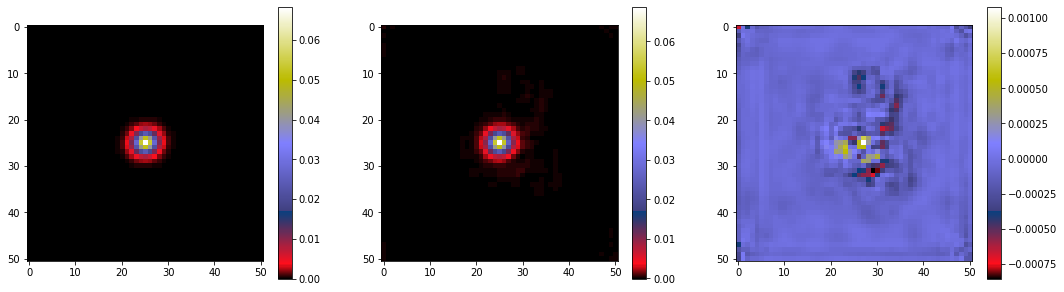

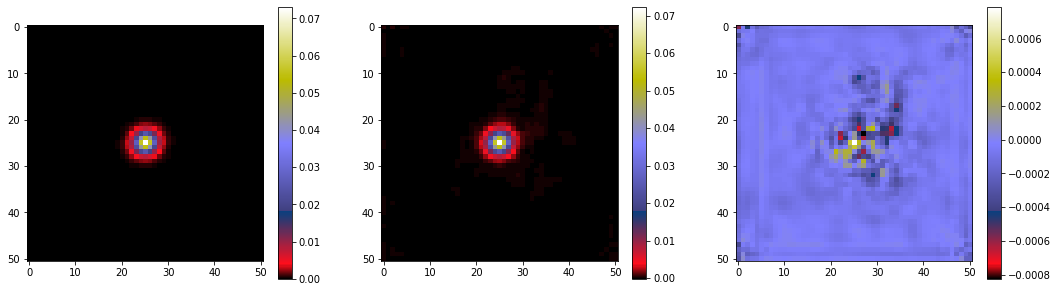

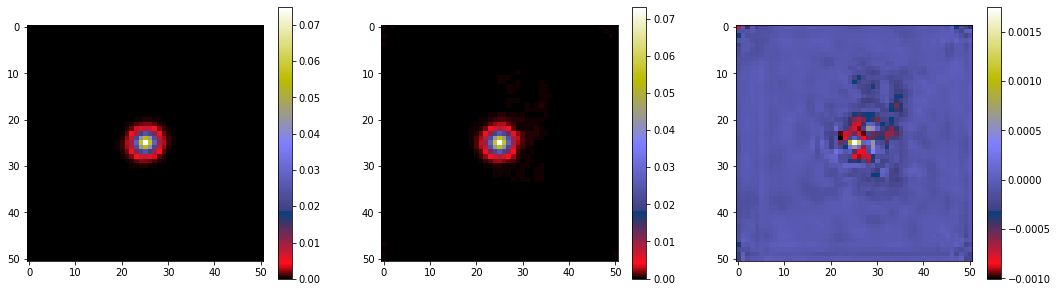

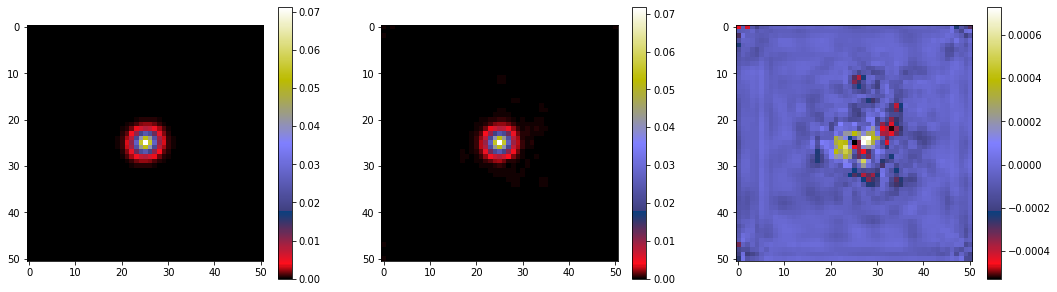

In [71]:

for it in range(15):

    figure(figsize=(18,5))
    
    subplot(131)
    imshow(input_stars[it,:,:], cmap=cmap);colorbar()
    
    subplot(132)
    imshow(input_psf[it,:,:], cmap=cmap);colorbar()
    
    subplot(133)
    imshow(input_stars[it,:,:] - input_psf[it,:,:], cmap=cmap);colorbar()
    show()


In [72]:

aziz_input_data_path = '/n05data/ayed/outputs/datasets/final_test/low_density/train_star_selection-1000000.fits'
aziz_input_data = fits.open(aziz_input_data_path)


In [74]:

aziz_stars = aziz_input_data[1].data['VIGNET_LIST']
aziz_input_data[1].columns


ColDefs(
    name = 'VIGNET_LIST'; format = '2601D'; dim = '(51, 51)'
    name = 'GLOB_POSITION_IMG_LIST'; format = '2D'; dim = '(2,)'
    name = 'MASK_LIST'; format = '2601D'; dim = '(51, 51)'
    name = 'CCD_ID_LIST'; format = '1D'
    name = 'TRUE_E1_HSM'; format = '1D'
    name = 'TRUE_E2_HSM'; format = '1D'
    name = 'TRUE_SIG_HSM'; format = '1D'
)

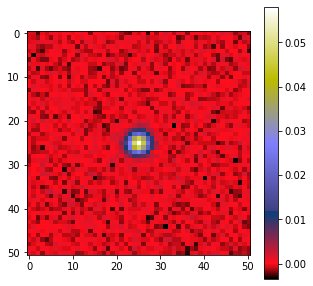

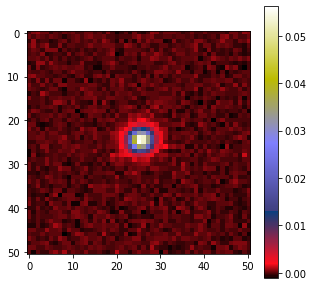

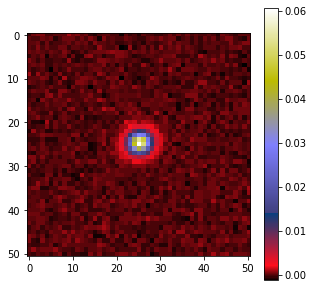

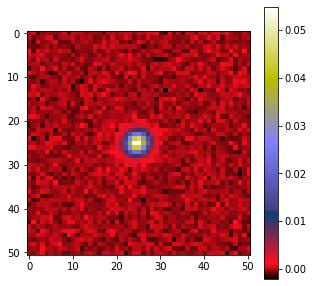

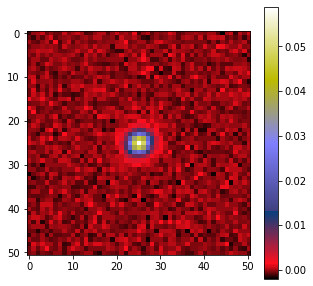

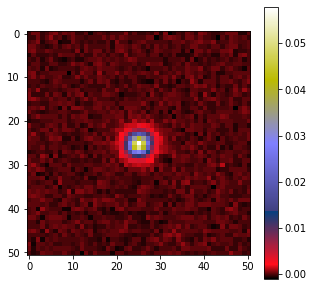

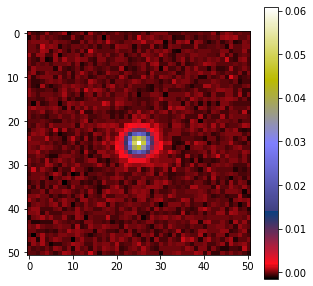

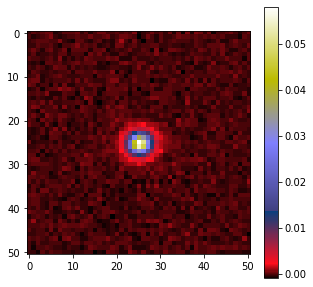

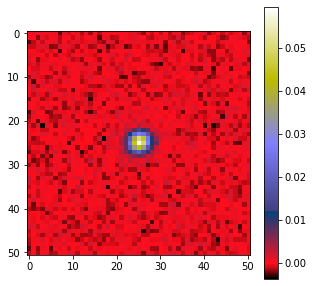

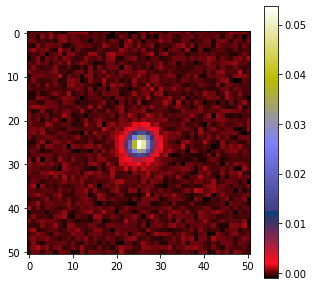

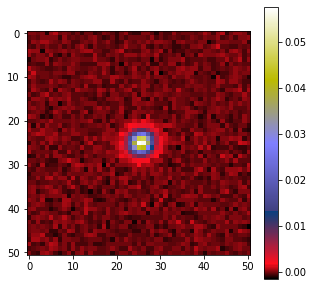

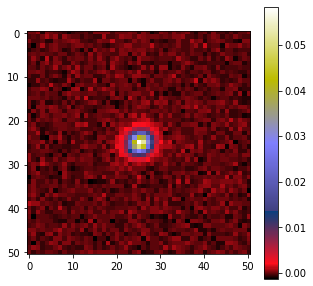

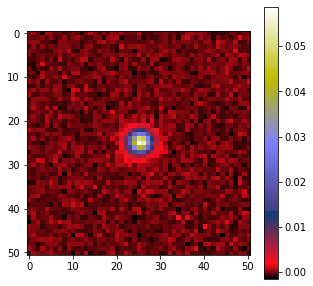

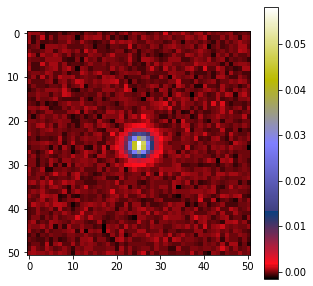

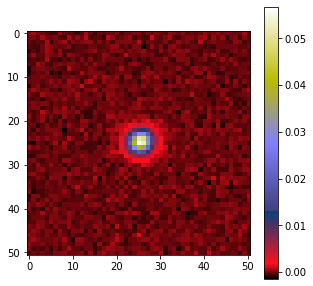

In [75]:


for it in range(15):

    figure(figsize=(5,5))
    imshow(aziz_stars[it,:,:], cmap=cmap);colorbar()
    show()
    